In [7]:
#Step 1
import pandas as pd
df_train = pd.read_csv("data/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.shape

(891, 12)

Non Survived: 549, Survived: 342


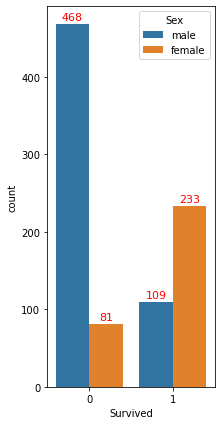

In [9]:
#Step 2

survived=df_train[df_train["Survived"]==1]["Survived"].count()
non_survived=df_train[df_train["Survived"]==0]["Survived"].count()
print("Non Survived: " + str(non_survived)+", Survived: " +str(survived))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3,7))
ax = sns.countplot(x="Survived",hue="Sex",  data=df_train)
plt.gcf().set_facecolor('white')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 11, color="r")

In [10]:
#Step 3: Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.
survived_1class=df_train[(df_train["Survived"]==1)&(df_train["Pclass"]==1)]["Pclass"].count()/df_train[df_train["Pclass"]==1]["Pclass"].count()
survived_1class



0.6296296296296297

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


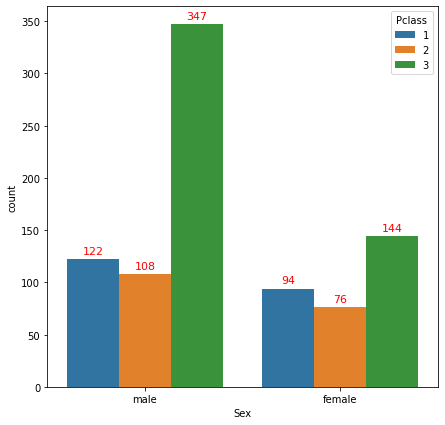

In [12]:
#Step 4 : Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.
import numpy as np
plt.figure(figsize=(7,7))
ax = sns.countplot(x="Sex", hue="Pclass", data=df_train)
plt.gcf().set_facecolor('white')
# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 5,rect.get_height(),horizontalalignment='center', fontsize = 11, color="r")


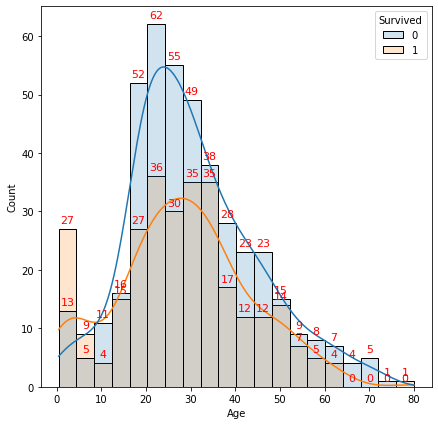

In [13]:
#Step 5: Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.
plt.figure(figsize=(7,7))
ax = sns.histplot(x="Age", hue="Survived", data=df_train,alpha=0.2, kde=True)
plt.gcf().set_facecolor('white')
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 1,rect.get_height(),horizontalalignment='center', fontsize = 11, color="r")

In [14]:
#Step 6:Calculate the average age for survived and drowned passengers separately.
average_age_survived=df_train[df_train["Survived"]==1]["Age"].mean()
average_age_died=df_train[df_train["Survived"]==0]["Age"].mean()
print("Average Age Survived: " + str(average_age_survived)+", Average Age Died: " +str(average_age_died))

Average Age Survived: 28.343689655172415, Average Age Died: 30.62617924528302


In [15]:
#Step 7: Replace missing age values by the mean age.
print("Number of missing Ages: "+str(df_train["Age"].isna().sum()))
print("Number of Ages: "+str(df_train["Age"].count()))
df_train["Age"].fillna(df_train["Age"].mean(), inplace=True)


Number of missing Ages: 177
Number of Ages: 714


In [16]:
df_train["Age"].isna().sum()

0

In [17]:
#Step 8: Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.
table=df_train.groupby(['Sex', 'Pclass',"Survived"])["Survived"].count()
table

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

In [18]:
table.index

MultiIndex([('female', 1, 0),
            ('female', 1, 1),
            ('female', 2, 0),
            ('female', 2, 1),
            ('female', 3, 0),
            ('female', 3, 1),
            (  'male', 1, 0),
            (  'male', 1, 1),
            (  'male', 2, 0),
            (  'male', 2, 1),
            (  'male', 3, 0),
            (  'male', 3, 1)],
           names=['Sex', 'Pclass', 'Survived'])

In [19]:
type(table)

pandas.core.series.Series